# Exercise

Use the code in this notebook to complete the following exercises:

1. For `df1`:

    - Take a look at the data in `df1`.
    - Does `x` increase from time one to time two?
    - Visualize the relationship between `x` and `time`.
    - Run a statistical test to further examine the relationship between these features.
    
 1. For `df2`:
 
    - Take a look at the data in `df2`.
    - Visualize the relationship between `x` and `y`.
    - How would you describe the relationship between `x` and `y`?
    - Run a statistical test to examine the relationship between `x` and `y`.

1. For `df3`:

    - Take a look at the data in `df3`
    - Which surgeon has the higher success rate?
    - If you had to have heart bypass surgery, which surgeon would you go to?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

## Question 1

In [2]:
df1.groupby('time').mean()

,x
time,
one,5.726669
two,7.296448


In [3]:
df1

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one
...,...,...,...
195,b,9.308194,two
196,a,3.931530,two
197,a,3.385066,two
198,b,8.247980,two


In [4]:
dfone = df1[df1['time'] == 'one']

In [5]:
dftwo = df1[df1['time'] == 'two']

<AxesSubplot:ylabel='Count'>

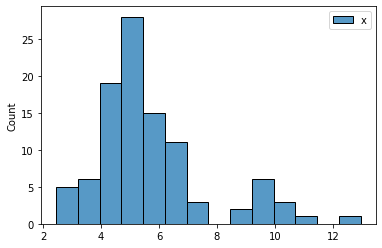

In [6]:
sns.histplot(dfone)

<AxesSubplot:ylabel='Count'>

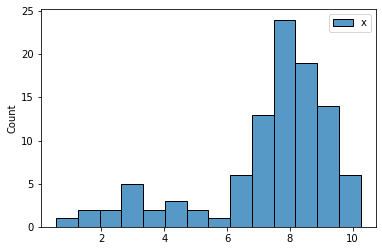

In [7]:
sns.histplot(dftwo)

In [8]:
stats.normaltest(dfone['x'])

NormaltestResult(statistic=31.455850658748354, pvalue=1.4772323770156165e-07)

In [9]:
stats.normaltest(dftwo['x'])

NormaltestResult(statistic=27.37463133522995, pvalue=1.1367745274945735e-06)

neither are normal, will have to use mann whitney u

In [10]:
stats.mannwhitneyu(dfone['x'], dftwo['x'])

MannwhitneyuResult(statistic=2600.0, pvalue=2.2741014828327088e-09)

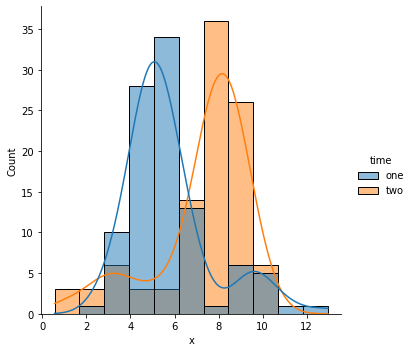

In [11]:
sns.displot(data = df1, x = 'x', hue = 'time', kde = True)

## Question 2

In [12]:
df2

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a
...,...,...,...
195,109.263191,647.120801,d
196,108.898932,640.437291,d
197,109.539255,629.554555,d
198,105.879511,647.396688,d


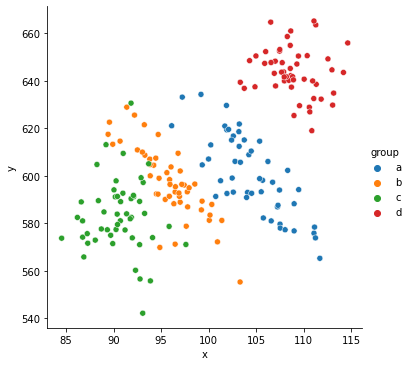

In [13]:
sns.relplot(data = df2, x = 'x', y = 'y', hue = 'group')

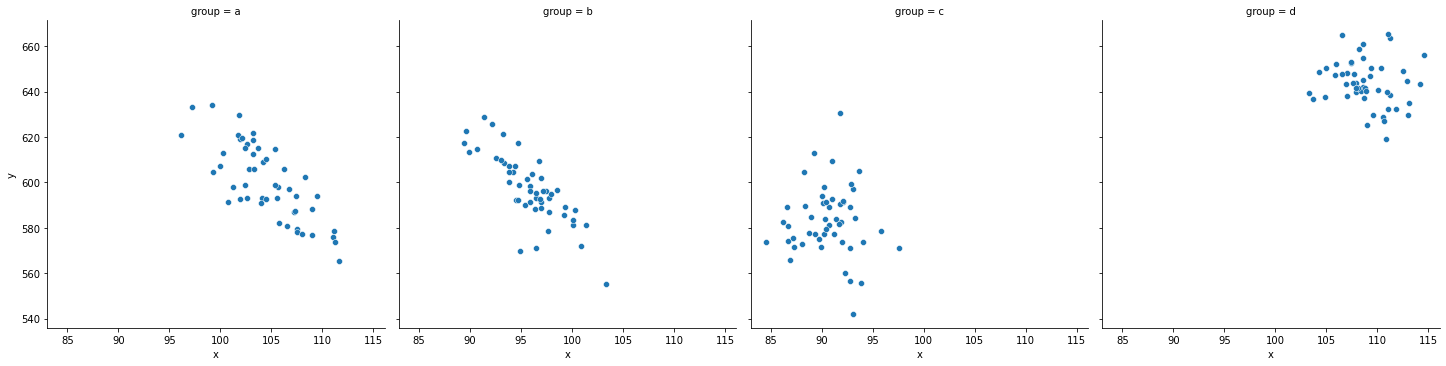

In [14]:
sns.relplot(data = df2, x = 'x', y = 'y', col = 'group')

<AxesSubplot:xlabel='x', ylabel='y'>

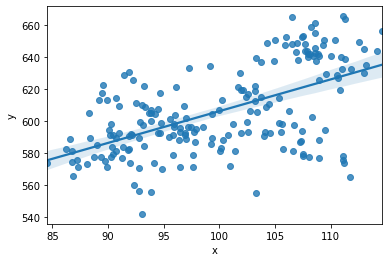

In [15]:
sns.regplot(data = df2, x = 'x', y = 'y')

The relationship is a weak positive correlation.

When looking at group, data tends to trend downward within each group

In [16]:
stats.normaltest(df2['x'])

NormaltestResult(statistic=142.64611164006612, pvalue=1.0587426902016032e-31)

In [17]:
stats.normaltest(df2['y'])

NormaltestResult(statistic=18.506434471833185, pvalue=9.58029350763499e-05)

In [18]:
stats.mannwhitneyu(df2['x'], df2['y'])

MannwhitneyuResult(statistic=0.0, pvalue=2.4154281951986995e-67)

## Question 3

In [19]:
df3

,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1
...,...,...,...
995,A,appendectomy,1
996,B,heart bypass,1
997,B,heart bypass,0
998,A,heart bypass,0


In [20]:
df3.groupby(by = 'surgeon').mean()

,success
surgeon,
A,0.877083
B,0.723077


Surgeon A has a higher success rate

In [21]:
df3[df3['surgery'] == 'heart bypass'].groupby(by = 'surgeon').mean()

,success
surgeon,
A,0.656566
B,0.672249


Surgeon B has a higher average success rate for heart bypass surgeries

In [22]:
dfa = df3[df3['surgeon']== 'A']
dfb = df3[df3['surgeon']== 'B']

In [23]:
dfa

,surgeon,surgery,success
0,A,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1
5,A,appendectomy,1
...,...,...,...
983,A,appendectomy,1
985,A,appendectomy,1
993,A,appendectomy,1
995,A,appendectomy,1


In [24]:
stats.chisquare(np.array(dfa['success'],dfb['success']))

Power_divergenceResult(statistic=59.0, pvalue=1.0)

In [25]:
stats.ttest_ind(dfa['success'],dfb['success'])

Ttest_indResult(statistic=6.156639257175547, pvalue=1.0751700288060976e-09)

In [26]:
suca = list(dfa['success'])
sucb = list(dfa['success'])

In [27]:
obs = np.array([suca, sucb])

In [28]:
obs = pd.crosstab(df3.surgeon, df3.surgery)

In [29]:
chi2, p, degf, expected = stats.chi2_contingency(obs)

In [30]:
chi2

354.57327773470234

In [31]:
p

4.2782067278294966e-79